# Who is going to benefit from a minimum wage rise?

## 1. Introduction

Most of the literature about the minimum wage (MW) has always focused on its employment effects, while these are central for computing the result of the policy, it is important to think of MW as a tool to redistribute income towards low-income workers and to shake inefficient companies.
The concept of a fair wage is something that had always been present in the literature since Adam Smith “A man must always live by his work, and his wages must at least be sufficient to maintain him. They must even upon most occasions be somewhat more; otherwise, it would be impossible for him to bring up a family, and the race of such workmen could not last beyond the first generation”.

The idea of MW as a tool to help the poor was already present in Stigler (1946) identifying the poor alleviation power of the policy and the risk of fostering inequality if differences in wages and cost of life existed between different regions. Burkhauser et al (1989) focused on understanding if the receiver of this policy were poor, their discoveries showed MW as a poor tool for income redistribution, "The overwhelming majority of low-wage workers are not poor; over half of the full-time working poor are not helped by the minimum wage, and most of the nonworking poor are hurt by its inflationary side effects. It is far from obvious that increases in the minimum wage make good policy even if the job losses so long associated with such increases did not take place".
Further research has been done by Freeman (1996) showing that MW is exposed to the poverty trap (nominal income grows, but real income decreases) and poor people are not usually employed in low-wage jobs (disabled people, unemployed). If firms affected by MW produced low price goods, as it could be, poor people are hurt by this reform and even more if they have negative employment effects. On the other hand, people far from being poor enjoying MW raises would not suffer most of the price adjustments. It is fundamental to not underestimate the price of labour transmission, if it is bear by the firm (lowering the profits) or by the consumers (higher prices) or simply substituted with capital (disemployment), a proper overview has been done for the case of Hungary by Harazstosi and Lindner (2019). Card and Krueger (1995) found no significant effect between poor reduction and MW raises. Other studies confirmed that the effect between poverty and MW is weak, Atkinson et al (2017) found out that MW workers in the UK are spread around the whole income distribution and the policy has poor redistributive effects, Burkhauser and Sabia (2007) showed that earners in poor households tend to earn more than the MW, Leigh (2007) showed that the connection is poor in Australia as well. A study conducted in Canada analyzing reforms for MW from 1981 to 2004 by Sen et al (2011) showed that higher teens are the most affected by these policies and if the outcome ends up being a job loss it matters most for poor households where teens are relevant income earners.

Understanding who is gonna be influenced by minimum wage (MW) raises is crucial to get a proper view of who is gonna benefit from these reforms and how the related job markets are gonna be affected by the policy. Understanding which industries are gonna be affected and how they will react, firing/keeping/hiring and cost transmission, is important to see the consequences of these reforms. Understanding if it ends up having more consequences for a precise social group, that could suffer already from tough living conditions. Keeping track of policy's receivers give a starting point to implement policies to help the ones left out of the job market after this reform, with a proper target and more efficient spending on subsidies both to help companies modernise and create more productive job places and to train employees and let them again in the job market. A clear view of MW workers will improve the awareness about its redistribution power and direction. Knowing who is gonna be influenced by the MW could be also the first step to understand if politicians propose these policies to reward certain categories of voters, an introduction to this topic has been done by Sobel (1999), showing that MW proposed is far both from the maximum income of the minimum worker and from an escape poverty income, demonstrating that unions and certain organized categories weigh more when it comes to MW level and timing.

To get a complete view of the effect on people, it is needed both to know the ones affected by the policy and which of them will retain their job. I will focus on the first part here. Much work has been done ex-post to understand who was affected by changes in MW. What about trying to predict who is gonna be affected? A clear starting point has been done by Cengiz et al (2022) using different machine learning techniques, elastic net logistic regression, trees, boosting, random forest. Starting from the data supplied by them I will try to conduct a simulation study to understand which is the right algorithm for precise sample size and how predictors' importance and different score metrics change with sample size.
The script will develop in the following: the description of the data, presentation of the methods, analysis and discussion and in the end the conclusion.

## 2. Data description 

The dataset used in this paper comes from the Current Population Survey (CPS), using the observation spanning over 40 years starting from 1979.
To be eligible to participate in the CPS, individuals must be 15 years of age or over and not in the Armed Forces. People in institutions, such as prisons, long-term care hospitals, and nursing homes are ineligible to be interviewed in the CPS. In general, the Bureau of labour Statistics publishes labour force data only for people aged 16 and over, since those under 16 are limited in their labour market activities by compulsory schooling and child labour laws. No upper age limit is used, and full-time students are treated the same as nonstudents. One person generally responds for all eligible members of the household. The person who responds is called the ‘‘reference person’’ and usually is the person who either owns or rents the housing unit. If the reference person is not knowledgeable about the employment status of the others in the household, attempts are made to contact those individuals directly.

The dataset used is the result of a transformation, filtering and selection of CPS from Cengiz, Doruk et al (2022).
They aim to predict exposure at minimum wage by individual characteristics.

The predictors explored in this writing are:
- race, categorical variable (White=0, Black=1) 'race'
- sex, categorical variable (Male=0, Female=1) 'sex'
- hispanic, categorical variable (No=0, Yes=1) 'hispanic'
- age 'age'
- married, categorical variable (NO=0, Yes=1) 'dmarried'
- rural status (No=0, Yes=1) 'ruralstatus'
- veteran status (No=0, Yes=1) 'veteran'
- high school degree dummy (No=0, Yes=1) 'hs_grad'
- some college dummy (No=0, Yes=1) 'some_college'
- college degree dummy (No=0, Yes=1) 'college_grad'

The outcome variable:
- relMW_groups, categorical variable (No=0, Yes=1)

The outcome variable has been mapped following the process of Cengiz, Doruk et al (2022): if below 125% of the minimum wage at that time and place then would show 1 as value, else 0. 


### Dataset size


In [1]:
import pandas as pd
from sklearn import ensemble
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

df=pd.read_csv('Pietro_ducco_dataset_assignment.csv').drop('index',axis=1)

print(f'dataset shape: {df.shape}')  #print the shape of the dataset, X and y

#drop the index as it stores twice (once as index and once as a variable)
y=df['relMW_groups'] # define outcome variable
X=df.drop('relMW_groups',axis=1) # define predictors matrix





df.head() # show some observations

dataset shape: (5220612, 11)


,race,sex,hispanic,age,dmarried,relMW_groups,ruralstatus,veteran,hs_grad,some_college,college_grad
0,0,1,0,20,0,0,0,0,1.0,1.0,0.0
1,0,1,0,19,0,0,1,0,1.0,1.0,0.0
2,0,0,0,42,1,0,1,0,1.0,1.0,0.0
3,0,0,0,18,0,0,1,0,1.0,0.0,0.0
4,0,1,0,49,0,0,0,0,1.0,1.0,0.0


In [2]:
df.describe()   #descriptive statistic of the variables, mean, sd, and other percentiles

,race,sex,hispanic,age,dmarried,relMW_groups,ruralstatus,veteran,hs_grad,some_college,college_grad
count,5.220612e+06,5.220612e+06,5.220612e+06,5.220612e+06,5.220612e+06,5.220612e+06,5.220612e+06,5.220612e+06,5.220612e+06,5.220612e+06,5.220612e+06
mean,1.376272e-01,4.904048e-01,8.764107e-02,3.835919e+01,5.744191e-01,1.695895e-01,2.290971e-01,1.176071e-01,8.623556e-01,5.263619e-01,2.667839e-01
std,3.445083e-01,4.999080e-01,2.827722e-01,1.334792e+01,4.944308e-01,3.752718e-01,4.202519e-01,3.221423e-01,3.445264e-01,4.993046e-01,4.422785e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,3.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,0.000000e+00,1.000000e+00,0.000000e+00,4.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,9.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [3]:
df[df.relMW_groups==1].relMW_groups.count()/X.shape[0] #share of people exposed to a MW raise

0.16958950406580683

In [4]:
df.corr()

,race,sex,hispanic,age,dmarried,relMW_groups,ruralstatus,veteran,hs_grad,some_college,college_grad
race,1.000000,0.034631,-0.064143,-0.008477,-0.088196,0.037853,-0.069577,-0.035832,-0.028703,-0.011600,-0.016292
sex,0.034631,1.000000,-0.032480,0.007099,-0.073716,0.117798,0.000160,-0.327143,0.056621,0.033414,-0.001409
hispanic,-0.064143,-0.032480,1.000000,-0.060637,-0.028730,0.079418,-0.091942,-0.065293,-0.194635,-0.117728,-0.100616
age,-0.008477,0.007099,-0.060637,1.000000,0.297628,-0.209901,0.007902,0.226822,0.061043,0.042466,0.092064
dmarried,-0.088196,-0.073716,-0.028730,0.297628,1.000000,-0.210680,0.052759,0.135344,0.088086,0.044382,0.091618
relMW_groups,0.037853,0.117798,0.079418,-0.209901,-0.210680,1.000000,0.071239,-0.103318,-0.264591,-0.209157,-0.201255
ruralstatus,-0.069577,0.000160,-0.091942,0.007902,0.052759,0.071239,1.000000,0.015860,-0.045565,-0.103158,-0.102257
veteran,-0.035832,-0.327143,-0.065293,0.226822,0.135344,-0.103318,0.015860,1.000000,0.038948,-0.007534,-0.026477
hs_grad,-0.028703,0.056621,-0.194635,0.061043,0.088086,-0.264591,-0.045565,0.038948,1.000000,0.421168,0.240990
some_college,-0.011600,0.033414,-0.117728,0.042466,0.044382,-0.209157,-0.103158,-0.007534,0.421168,1.000000,0.572196


### View on age
Before moving into methods it is worth looking at the difference in the distribution of age between people exposed at MW and who is not.


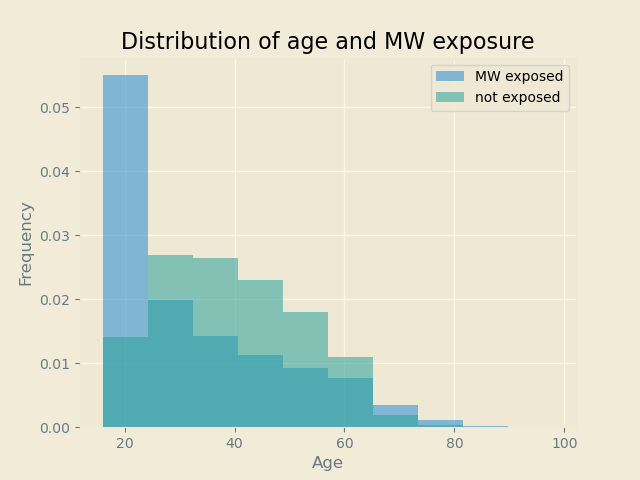


The graph above is coherent with what is said in the literature review, most of the people exposed to the minimum wage are young, more than 25% of them are below 20 years old and the median is 26.


## 3. Methods

Given the dataset available we have two groups when it comes to minimum wage exposure (relMW_groups, outcome variable).

relMW_groups=1 exposure to a minimum wage raise
relMW_groups=0 not exposed to a minimum wage raise
${1,0}$ (yes or no)

### Logistic regression



$X$ vector of predictors

$MW$ Outcome variable

Logistic regression (LR) is a classification algorithm derived from the combination of regression and logistic function.
LR does not model the response variable (MW) directly, but works on the probability of belonging to that category '''(e.g. MW=1 or MW=0)'''
Probability of being exposed to a minimum wage rise given X $p(X)=Pr(MW=yes|X)$

We lean over a threshold of 0.5, if the probability of belonging to MW group is bigger or equal than 0.5 then we predict that observation as MW=1

$Pr(MW=Yes|X)$

We want to predict $MW=yes$ if $Pr(MW=Yes|X)>0.5$. How can we define the relationship between X and $Pr()$? 

An intuitive description of $p(X)$ could be $p(X)= BX$
Where $X$ is a vector containing all the independent variables and $B$ a vector of the coefficients

Since we are speaking of probabilities we need a function that is restricted between 0 and 1. To overcome this problem we use a logistic function. 

logistic function : $e^{BX}/(1-e^{BX})$

$p(X) = e^{BX}/(1-e^{BX})$

#### Logistic function

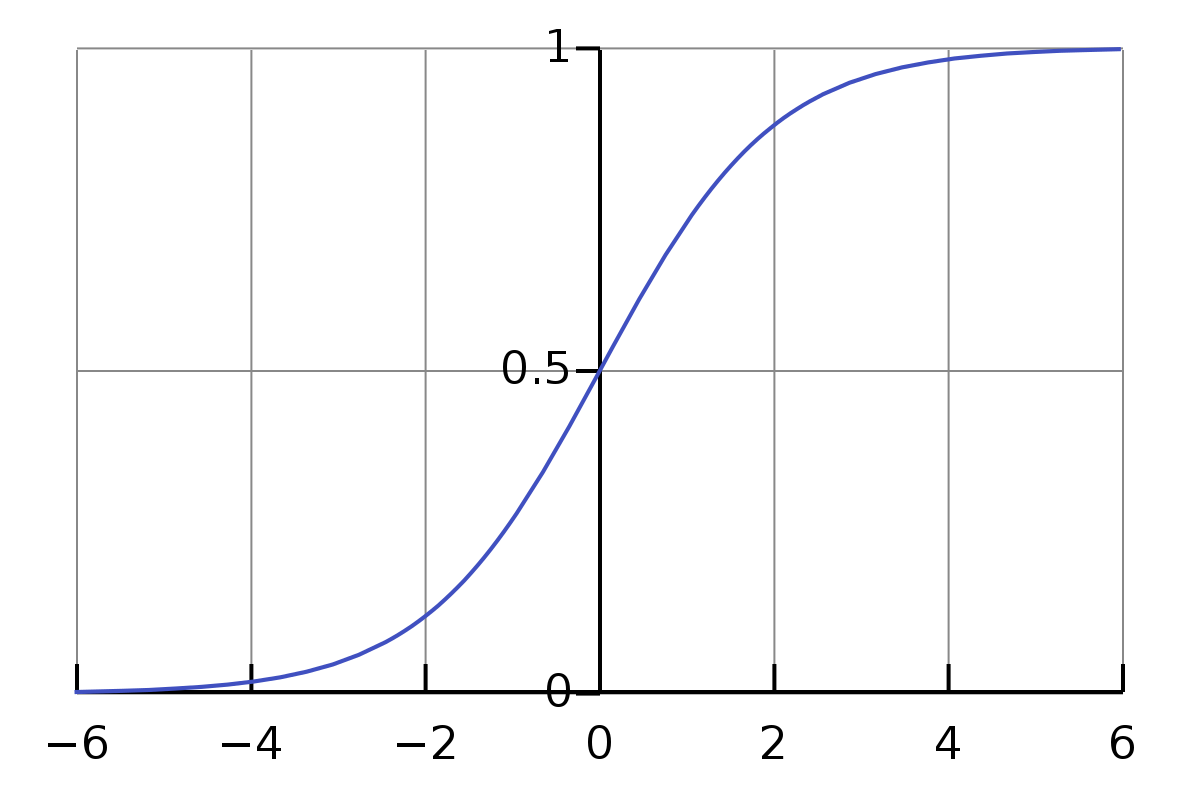

The logistic function allows the input, $BX$ to be any values ranging from $(-\inf,\inf)$ while the output will always belong to the interval $(0,1)$. 

Rearranging leads us to $p(X)/(1-p(X)) = e^{BX}$. #think about rearranging and expressing in p(x)

The value change in $log(p(X)/(1-p(X))$ by a variation of 1 in the $X_n$ predictor is given by the value of the coefficient $B_n$. 

The optimizer used by the package is called $lbfgs$: "Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations".

The default prediction of our algorithm is $e^{intercept}/(1+e^{intercept})$

The strength of LR is to express linearities, these are implicit in its functional form $B_0 + \sum_{k in K}^K B_kX_k$ . Logistic regression also gives us a chance to see how marginal changes in covariates influence the final predictions. However, our covariates are mostly dummy variables of qualitative data and non-linear, so these advantages would likely not be exploited in this paper.

### Classification trees

Tree-based algorithms are one of the categories in machine learning methods, they lay their foundations in decision trees.
The main idea behind tree based algorithm is to divide the dataset into groups (or regions) $(A={X|X_1>1} B={X|X_1<=1})$ and use the groups' averages as a prediction for all the observations belonging to them. When it comes to classifying observations the prediction is the most recurring outcome value.

 
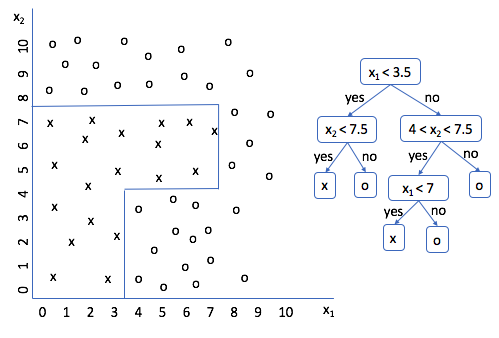

The first split is the only one to take as domain the whole dataset, all the subsequent splits will operate inside the already determined regions. The final regions/groups are also called leaves or terminal nodes.
Splits are determined by a greedy approach called recursive binary splitting.
It is called greedy because it tends to minimize the Gini index (or entropy) with the next split without knowing if another solution would have achieved a better result in further splits. This is a myopic algorithm.
We split by minimizing Gini, other options are available, but this is the one I will use in this paper. 
We proceed one step at a time and by always minimizing the below formula we end up choosing the split over the biggest marginal decrease. 

Gini Index: $\sum_{k=1}^K\hat{p}_{mk}(1-\hat{p}_{mk})$

This process could go on for an infinite amount of time (unless a stopping rule is given) until all groups/regions are made of one data point and the Gini index is minimized and prediction error. But this will be a strong overfitting algorithm.
The more a predictor reduces the Gini index the more important it is. 


#### Pruning
This is when Tree pruning comes into the game. 
Reducing the variance of the prediction would help improve the algorithm performance on the test set and make our tree less prone to overfit. Pruning is the process of trying to achieve that by splitting less.  
However, stopping to split when the additional amount of Gini index erased does not go over a threshold is not enough, it would be short-sighted another time. 
Pruning consist of growing a very large tree and then selecting the subtree that performs the best on the test set, this is done by a cross-validation approach.

Cost complexity pruning:  $\sum_{m=1}^{|T|}\sum_{x_i\in R_m}((y_i-y_{R_m}) + \alpha*|T|)$.

$T$ is the number of terminal nodes, each split adds one.

Alpha is called the "cost complexity parameter" and its presence implies a tradeoff between explainability (fewer splits) and $R^2$ score. 
The cost complexity parameter is selected by using cross-validation. It is decided which is the price to pay for an additional split. Then, each split present in the tree needs to be worth it, needs to be more valuable than the additional complexity cost ($\alpha$), any split that reduces the Gini index by less than $\alpha$ is gonna hurt our prediction score in the cross-validation phase (a proxy for the test set), so it would imply not carrying out that split.
An increase in $\alpha$ would return more pruning while a decrease will imply a lesser amount. The perfect size of alpha is decided by K-fold cross-validation. 

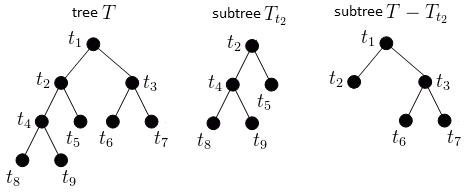 


### Random forest
Random forest is a tree-based algorithm.
It starts from bagging, building decision trees over bootstrapped training samples, but with the main addiction of a different predictors choice.
The main idea behind this method is to understand the importance of each parameter and overcome the greedy approach. It is achieved by generating several decision trees using only a subset of the predictors ($m \in p$).
set of available predictors: $p$
the chosen subset of available predictors: $m$
For a tree with $m$ parameters available, each split is gonna be taken over one of the available predictors included in $m$. Random forest returns uncorrelated trees due to predictors' restrictions.
In the end, for each datapoint, the most recurring prediction is the output of the random forest. 
This method, like bagging, reduces the variance of the results, due to the uncorrelated trees, making it less prone to overfitting compared to a single tree or a pruned one. 

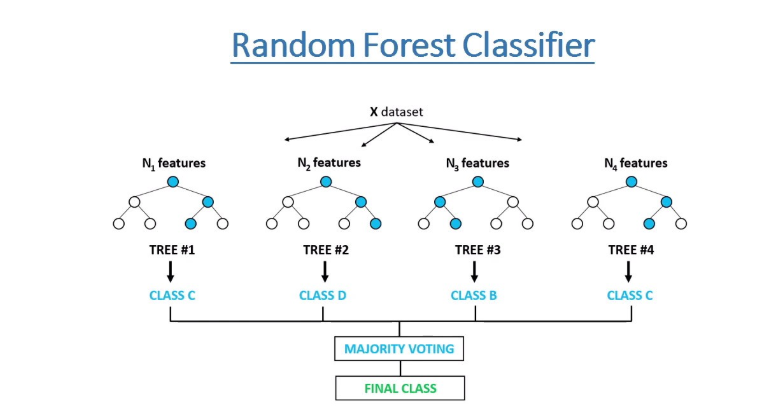 

In Scikit-learn (python package used for analysis) Gini is used as with Tree, the number of trees build is one hundred and the subset $m$ is made of $\sqrt{p}$ parameters as our book used to show as the optimal amount (p343, An introduction to statistical learning)


Tree based-methods tend to work better with non-linear data, they excel at expressing categorical variables and identifying very well interaction terms.
These methods do not assume any functional form differently from logistic regression.
These methods also tend to have very interpretable visualization, for a single tree it is easy to just follow through the splits to end up with the prediction.
Tree based methods are highly dependent on the training set they are trained on. For a single tree is quite easy to see it happening, mostly if not pruned. For a random forest there is a degree more of complexity. Even if not all predictors are always available the trees are always built on the same datapoints, even less since the training set are boostrapped for each tree component of the forest, so they will end up overfitting as well, but probably less than a single tree due to the reduction in the variance.


## 4. Simulation studies and results
In this part, I will describe the result of a simulation study, by looking at predictors' influence and at different scores measures.

### Simulation studies
The simulation studies I conducted are quite straightforward.
The idea is to run the algorithms described in section 3 on samples of different sizes and to look at scores' changes while increasing the training sample size.
after I will try to understand which is the right algorithm to use to achieve a specific result when we are given certain sample size.

The sample sizes will be 5k, 25k, 50k, 250k, 500k, and 1 mln.

The simulation will run the same algorithm on different samples of the same size 50 times and extract relevant scores for each iteration before moving to the next size.

Given the characteristics of the methods I would expect tree based methods to have a better performance with bigger sample sizes, also some changing in importance for some features with an increase in sample size.


In [5]:
def routine(function,size_test,X,y):
    
    
    #this method randomly divides X and y into training set and test set giving as input the size of the test set (in terms of the whole dataset)
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size_test) 
    print('fitting model') #just to understand where I was standing while the code was running
    function.fit(X_train,y_train) #this function train the input function (could be logistic regression, or some other) with the input training predictors (X_train) and the input training outcome variable (y_train)
    print('computing score') #to understand how long it took
    score_test=function.score(X_test,y_test) # computes the accuracy on the test set
    score_training=function.score(X_train,y_train) #computes accuracy on the training set
    
    print('done') # to see if scoring took long
    
    if 'fit_intercept' in dir(function): #dir(function) returns a list of attributes of the object "function"
        features=list(np.append(function.coef_, function.intercept_) )# we return different variable for "features" one if is a logistic regression (with the intercept) and the second one for the two tree based methods
    else:
        features=list(np.append(function.feature_importances_, np.nan) )#length is 11
    
    pred=pd.DataFrame(function.predict(X_test), index=X_test.index) # computing the prediction on the test set
    
    dataset=pd.merge(y_test,pred,'left',left_index=True,right_index=True) #merge predictions and outcome variable of the test set on index to get them on the same record
    
    dataset.columns=['true','pred'] #I named the 
    
    true_neg=(dataset.true==0).sum()
    pred_neg=(dataset.pred==0).sum()
    true_pos=(dataset.true==1).sum()
    pred_pos=(dataset.pred==1).sum()
    true_neg_pred=(dataset[dataset.true==0].pred==0).sum()
    false_neg_pred=(dataset[dataset.true==1].pred==0).sum()
    true_pos_pred=(dataset[dataset.true==1].pred==1).sum()
    false_pos_pred=(dataset[dataset.true==0].pred==1).sum()
    
    #return multiple objects
    result=[score_training,score_test, true_neg, pred_neg,
            true_pos, pred_pos, true_neg_pred, false_neg_pred,
            true_pos_pred, false_pos_pred  , X_test.shape[0]*(1-size_test)] + features #3

    return  result


logreg=linear_model.LogisticRegression(penalty='none',n_jobs=-2) #creating a variable storing the logistic regression model with no regularization and to use almost all computing power

tree_class= tree.DecisionTreeClassifier(criterion='gini') #creating a variable storing the tree classifier and using as a criteria gini index

random_forest= ensemble.RandomForestClassifier(n_jobs=-2) #gini and n_estimators are 100 (by standard)

test_set_sizes=[0.999,0.995,0.99,0.95,0.9,0.8] #different size of test set as share of the dataset, will be input of train_test_split method

labels=['score_training','score_test', 'true_neg', 'pred_neg',
        'true_pos', 'pred_pos', 'true_neg_pred', 'false_neg_pred',
        'true_pos_pred', 'false_pos_pred', 'training_set_size'] + list(X.columns) + ['intercept'] #list of labels

#RUN ONLY IF YOU WANT TO DOUBLE CHECK, SIMULATION STUDY TAKES AROUND 5 hours


''' 

multi_index=pd.DataFrame(np.zeros(shape=(50,6))).unstack().index #we create a multiIndex.


df_logreg=pd.DataFrame(np.zeros(shape=(300,22)),index=multi_index,columns=labels) #creating the datasets that will store the variables, with defined labels and indexes
df_tree=pd.DataFrame(np.zeros(shape=(300,22)),index=multi_index,columns=labels)
df_forest=pd.DataFrame(np.zeros(shape=(300,22)),index=multi_index,columns=labels)





for i in range(0,len(test_set_sizes)):   #6
    for time in range(0,50):                          #50
        df_logreg.loc[(i,time)]=routine(logreg,test_set_sizes[i],X,y)
        print(f'{time}_{i}')

df_logreg.to_csv('df_logreg.csv')


for i in range(0,len(test_set_sizes)):   #6
    for time in range(0,50):                          #50
        df_tree.loc[(i,time)]=routine(tree_class,test_set_sizes[i],X,y)
        print(f'{time}_{i}')
df_tree.to_csv('df_tree.csv')

for i in range(0,len(test_set_sizes)):   #6
    for time in range(0,50):                          #50
        df_forest.loc[(i,time)]=routine(random_forest,test_set_sizes[i],X,y)
        print(f'{time}_{i}')
df_forest.to_csv('df_forest.csv')
'''  #RUN ONLY IF YOU WANT TO DOUBLE CHECK, SIMULATION STUDY TAKES AROUND 5 hours

train_set_sizes=[5000,25000,50000,250000,500000,1000000]


def compute_scores(df): #compute the metrics used in this script
    df['precision'] = df['true_pos_pred']/df['pred_pos']
    df['recall'] = df['true_pos_pred']/df['true_pos']
    df['specificity']=df['true_neg_pred']/df['true_neg']


plt.style.use('Solarize_Light2')

plt.rcParams['figure.facecolor']='#f1ebd8'




def load_and_scores(path): #method that correctly load the dataset and shape them in precise way, stacking some indexes in a different way
    df=pd.read_csv(path)
    df.index=pd.MultiIndex.from_frame(df.loc[:,'Unnamed: 0':'Unnamed: 1'])
    df=df.drop(['Unnamed: 0', 'Unnamed: 1'],axis=1)
    compute_scores(df)
    df.index.names=('size','time')
    df.columns.names=['vars']
    df=df.stack('vars').unstack('size').unstack('vars')
    return df



df_logreg=load_and_scores('Pietro_ducco_df_logreg.csv')
df_tree=load_and_scores('Pietro_ducco_df_tree.csv')
df_forest=load_and_scores('Pietro_ducco_df_forest.csv')



### Evaluation metrics
It is useful to introduce some concepts:

- False negative: Wrongly predicted negative values $FN$
- False positive: Wrongly predicted positive values $FP$
- True negative: Rightly predicted negative values  $TN$
- True positive: Rightly predicted positive values  $TP$
- Positve values $P = FN + TP$
- Negative values $N = TN + FP$
- Positive predicted values $P* = FP + TP$
- Negative predicted values $N* =FN + TN$

I will use positive values for relMW_groups equal to 1.
There are different metrics to evaluate the results of a classification algorithm.
I will use the one presented below.

#### Accuracy
Amount of correctly predicted values:  $\frac{TN+TP}{TN+TP+FN+FP}$
we will measure it both on training set and test set.

#### Precision
Amount of correctly predicted positive values over predicted positive values: $\frac{TP}{P*}$

#### Recall (or sensitivity)
Amount of correctly predicted positive values over true positive values: $\frac{TP}{P}$

#### Specificity 
Amount of correctly predicted negative values over true negative values: $\frac{TN}{N}$

### Features

#### Logistic regression
In this case we will evaluate the coefficients in mean and variance, is the only one to also have an intercept.



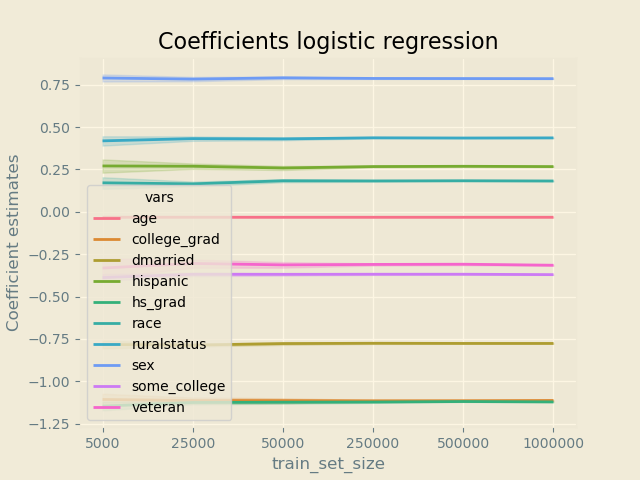

The interpretation that the model uses in the first place is very similar to the one used in further simulations. Training set size does not shake the predictors' coefficient much.
All of them registered a bigger standard deviation with smaller samples, showing that a biased sample could change the estimates. Becoming even twenty times smaller for some variables, is it easy to see the advantages of bigger samples.

Age has a slightly negative effect showing that with age the risk tends to go away.
Sex tends to negative impact on women raising the probability of being exposed to minimum wage.
Education of any level positively impacts the chances to escape minimum wage.
Rural status and minorities do not help with exposure to MW.

#### Tree (not pruned)
Since it is not possible to use coefficients, we use feature importances, variances reduce greatly with the increase in sample size.
Age is above all in terms of importance and Gini reduction. For each tree, it is always been the most important parameter.
"Sex" and "hs_grad" grow in importance with an increase in sample size, this pattern becomes clear from 25k observations. Their rise in importance comes at the expense of almost all the other parameters besides "age" (raise as well with sample size) and "college_grad". 

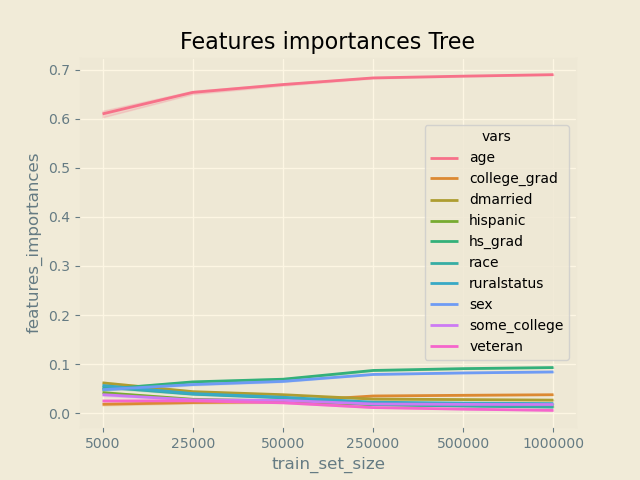

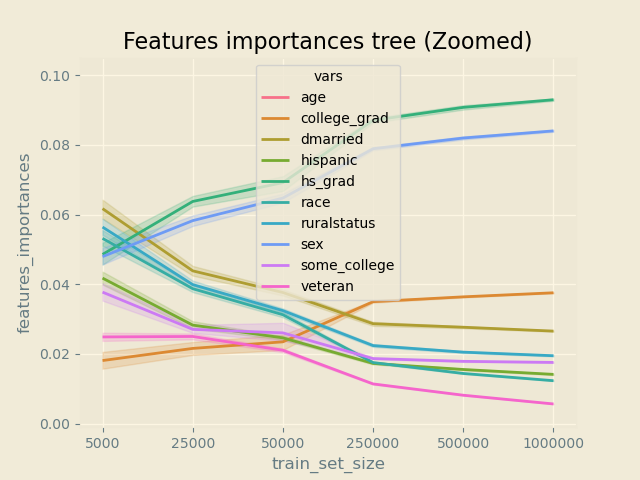 (I didn't put any script for this pictures since it took me very long to plot it and is one random tree from the simulation study)

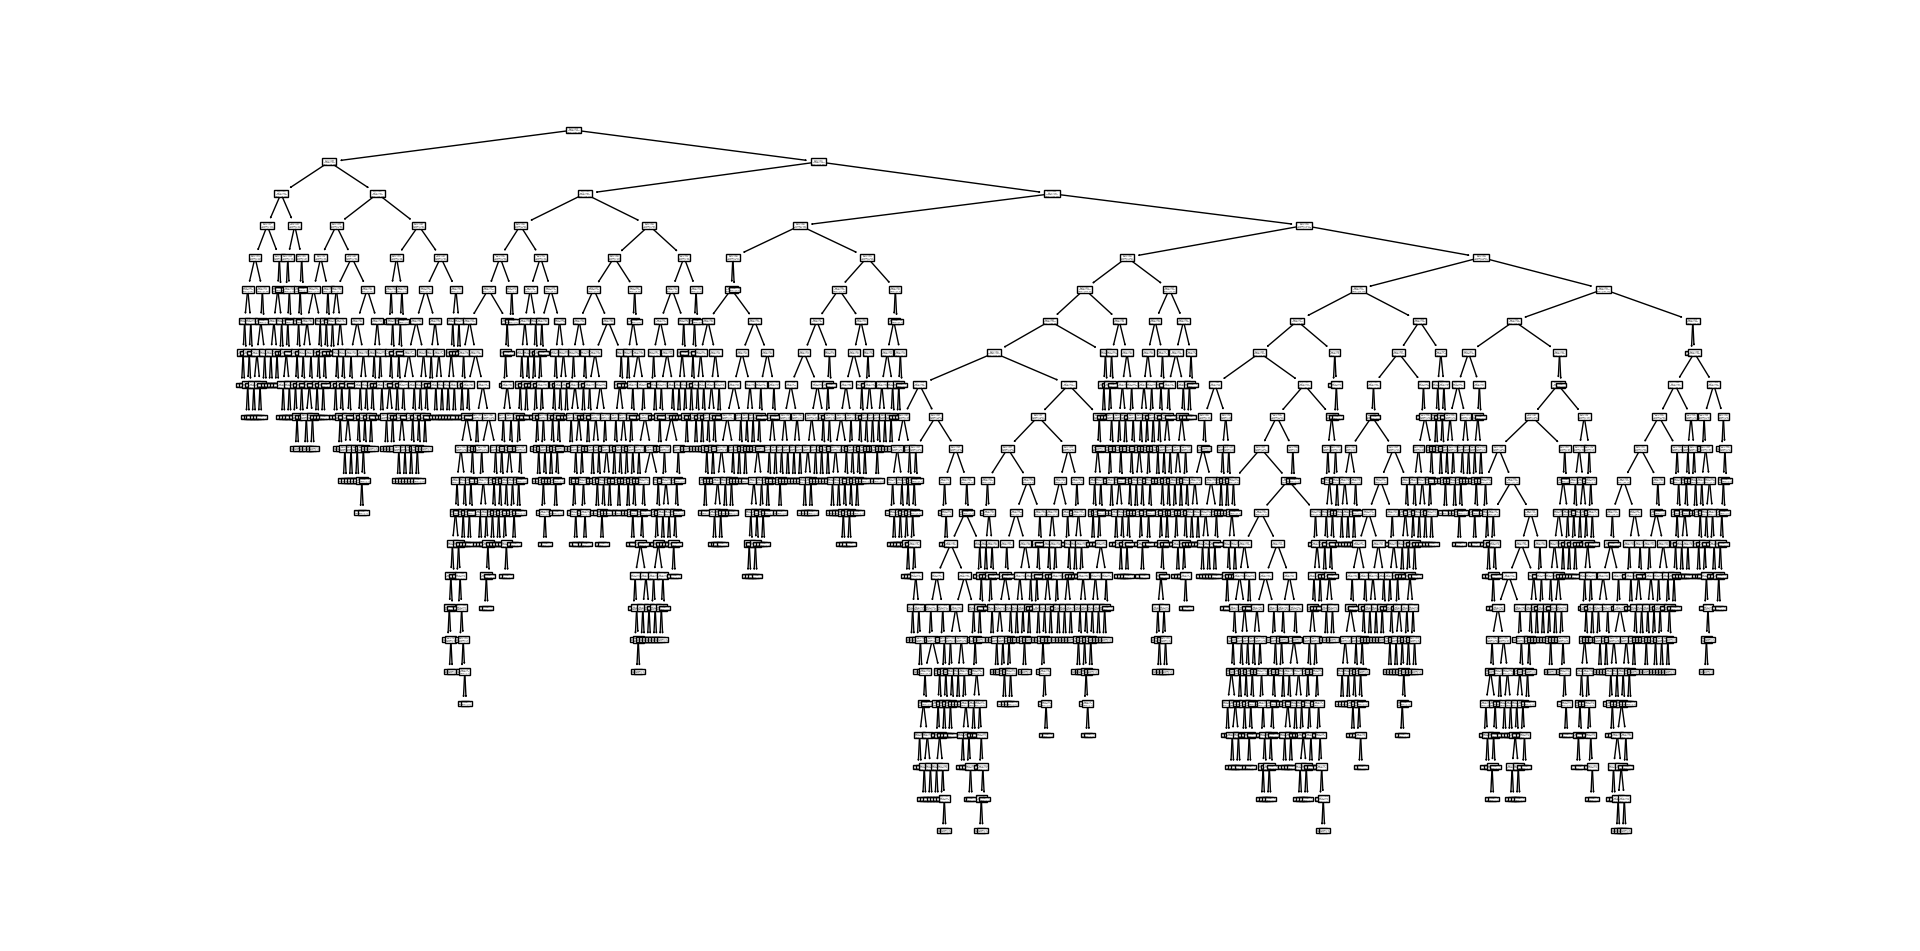


#### Random Forest
It shows a very similar pattern to the tree results, besides the importance of the age variable, here it does not grow with the sample size and in the end reaches less importance than before (0.52 compared with almost 0.7)

"hs_grad" and "sex" are important as they were in trees while it catches our attention the "dmarried" variable.


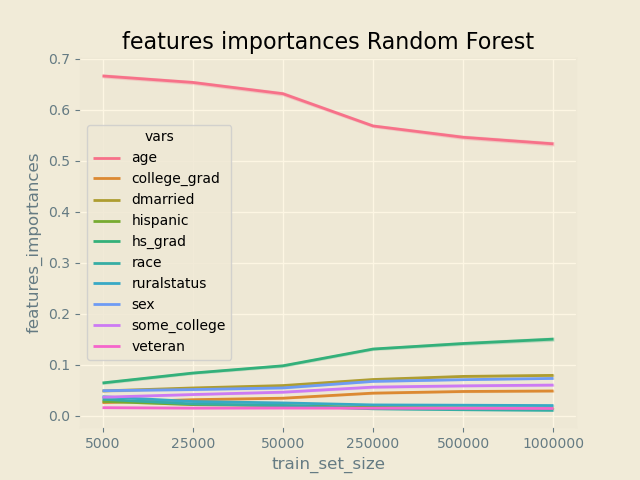

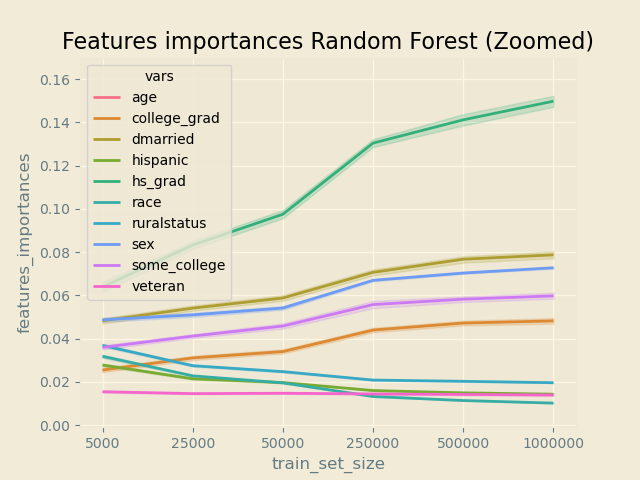


### Comparing scores

#### Accuracy
I decided to compare accuracies on the training set and test set to expose the presence of overfitting and understand if there is a clear dominance of one algorithm over the others or if different algorithms have different strengths.

The results show clear overfitting of random forests and trees in small samples (more than 10% difference in accuracy), while lower in bigger samples (around 1%)
On the other hand, Logistic Regression seems to avoid this problem
Until 50k observations the strategy to achieve the highest accuracy is to use LR while over that threshold tree-based methods become more efficient.


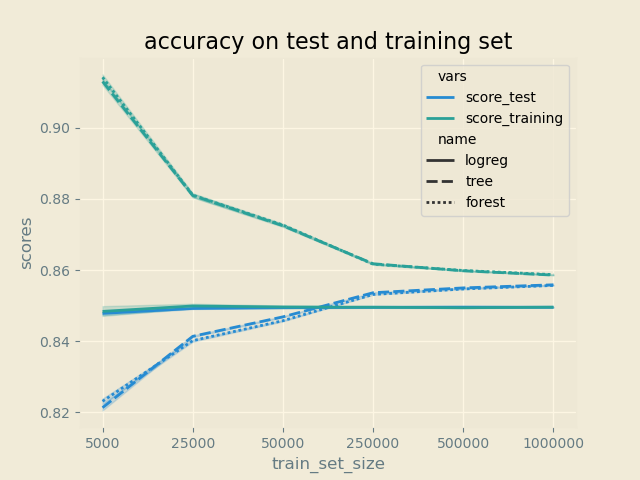

(Small note on the graph, color is the set and linetype the method, e.g. blue dotted line accuracy of forest on test set)


#### Precision, Recall and Specificity
The two tree-based methods follow a similar pattern even when it comes to other metrics. Logistic regression shows a difference compared to the tree-based methods used here, but they all tend to converge to the same point in the end besides for recall.

The first thing to look at is the difference in precision between LR and the tree-based methods.
LR tends to make fewer mistakes when predicting someone being exposed to MW compared to trees and random forests. It is impossible not to examine precision without looking at recall, showing that even LR catches less of the exposed to MW compared to the other methods. Because it tends to predict more non-belongers as it is convenient given the difference in shares.
These two metrics tend to converge in the end, but recall shows a distance that justifies the difference in accuracy.

Specificity is the same concept as a recall but with negative values as domain, LR that tends to predict more 0's showed a better performance overall. 

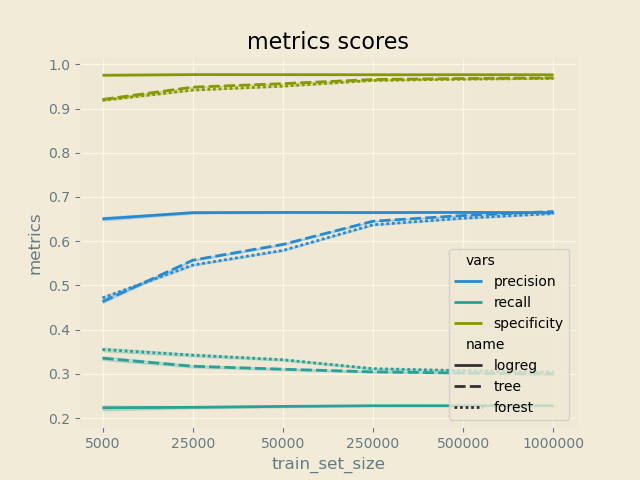


## 5. Conclusions

Differently from what was studied by Cengiz, Doruk et al (2022) I focused on sample size, by using Logistic Regression, Tree classifier and Random Forest Classifier I conducted a simulation study on six different sizes: 5k, 25k, 50k, 250k, 500k and 1mln.
The results were in line with the paper above cited, Random forest classifier and tree-based methods were revealed to be the best predictors with the large available sample size. On the other hand, the purpose of my study was to look at the performances of these algorithms with different sample sizes. The discoveries are interesting, LR tends to perform better, measured on accuracy, than the tree-based methods until 250k observation where the trends changes.
Logistic regression tends to produce less positive predictions overall compared to tree-based methods.
This study confirmed the importance of education and age variable as a key explanator, in tree-based methods, it accounts for more than 50% in feature importance.
Further studies should focus on understanding which is the precise threshold at which tree-based methods become more accurate.



## Bibliography

Smith, Adam. An Inquiry Into the Nature and Causes of the Wealth of Nations... T. Nelson and Sons, 1887. https://books.google.de/books?hl=it&lr=&id=5LEyAQAAMAAJ&oi=fnd&pg=PA3&dq=adam+smith+inquiry&ots=v6Ce819qvk&sig=ZeIcAXepeHaTSOB4LlNKiu6YOQM&redir_esc=y#v=onepage&q=adam%20smith%20inquiry&f=false

Cengiz, Doruk, et al. "Seeing beyond the trees: using machine learning to estimate the impact of minimum wages on labor market outcomes." Journal of Labor Economics 40.S1 (2022): S203-S247.https://www.journals.uchicago.edu/doi/suppl/10.1086/718497

Atkinson, A.B., Leventi, C., Nolan, B. et al. Reducing poverty and inequality through tax-benefit reform and the minimum wage: the UK as a case-study. J Econ Inequal 15, 303–323 (2017). https://doi.org/10.1007/s10888-017-9365-7

Burkhauser, Richard V., and Joseph J. Sabia. "The effectiveness of minimum‐wage increases in reducing poverty: Past, present, and future." Contemporary Economic Policy 25.2 (2007): 262-281. https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1465-7287.2006.00045.x

Sen, Anindya, Kathleen Rybczynski, and Corey Van De Waal. "Teen employment, poverty, and the minimum wage: Evidence from Canada." Labour Economics 18.1 (2011): 36-47. https://www.sciencedirect.com/science/article/pii/S0927537110000771?casa_token=0KkE8AxboKUAAAAA:XKR1sOO4AszNFDgWW2QbiV8QrOxTeR3mgc_2a8If5mFt1IigZJLZEqmNGd-o3n7tZYqYlFegFA

Freeman, Richard B. "The minimum wage as a redistributive tool." The Economic Journal 106.436 (1996): 639-649.
https://www.jstor.org/stable/pdf/2235571.pdf

Harasztosi, Péter, and Attila Lindner. "Who Pays for the minimum Wage?." American Economic Review 109.8 (2019): 2693-2727.
https://www.jstor.org/stable/pdf/26747405.pdf?casa_token=ZSsQGyZCv40AAAAA:cBbN95QpMI1a3wbLm4kOPB1arajDVFu6BkoyJBd4r6VX0ASGvIHkCWJp4TMaCev4_G0TO85pcnu3mICrWU_euRDb-Q9z9nm8Iq5xWJWDcwwGq4HTcEQ

Sobel, Russell S. "Theory and evidence on the political economy of the minimum wage." Journal of Political Economy 107.4 (1999): 761-785.https://www.journals.uchicago.edu/doi/pdf/10.1086/250078

Leigh, Andrew. "Does raising the minimum wage help the poor?." Economic Record 83.263 (2007): 432-445.
https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1475-4932.2007.00432.x

Another example of asking if MW helps the poor has been supplied by Burkhauser (1989) Burkhauser, Richard V., and T. Aldrich Finegan. "The minimum wage and the poor: The end of a relationship." Journal of policy Analysis and Management 8.1 (1989): 53-71.https://www.jstor.org/stable/pdf/3324424.pdf

Card, David, and Alan B. Krueger. "Time-series minimum-wage studies: a meta-analysis." The American Economic Review 85.2 (1995): 238-243. https://www.jstor.org/stable/pdf/2117925.pdf

Stigler, George J. "The economics of minimum wage legislation." The American Economic Review 36.3 (1946): 358-365.
https://www.jstor.org/stable/pdf/1801842?casa_token=-otK3xvSW9wAAAAA:zoc-bi4Z_rWdreazm3GUYjDsaYAVbTg6Iz3q_GY0xH6SYwy0TksY0wkQxVDIllV-fRpZcjC8W3TrHt4tU33Rznb65KJUX4ydpbHUmAJmPSoYgXHXSgU

Sarah Flood, Miriam King, Renae Rodgers, Steven Ruggles, J. Robert Warren and Michael Westberry. Integrated Public Use Microdata Series, Current Population Survey: Version 9.0 [dataset]. Minneapolis, MN: IPUMS, 2021. https://doi.org/10.18128/D030.V9.0
https://cps.ipums.org/cps/citation.shtml

James, Gareth, et al. An introduction to statistical learning. Vol. 112. New York: springer, 2013. https://d1wqtxts1xzle7.cloudfront.net/37162300/An_Introduction_to_Statistical_Learning_with_Applications_in_R-with-cover-page-v2.pdf?Expires=1661185500&Signature=X5hd-0wBY9kNyFK43Z5ovKoje7dmfwQ1ZZ~GQjv3Mt9PCYn-hqQJK7ZwuI9h9-nihfkUMWsTohjqZmDuhU5XX74lFf7tllVYQFnORj2g~i1f4vmdUKKg-CrFVvFhRdP4N4ursJl6yOHPMZs2a6S-brlI~61z9ArRZu2nYOZxohIvxGvicxQ396QiQYn7CfjccDazo9G1M~hp9zEFS1UlSeZK4XADBxqV1PtrOOo~ypxfngRbxLUoF0Zv7G1POIAYGkQVPDpgNwTz4jAWfHD6llOMhuU17LVaCS5bNe4eOCFchLI2G6sRfgTqMl7ntoLd1y4na6MVbXyYbm2bvpkY9Q__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

packages' sources:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
https://pandas.pydata.org/docs/index.html

## Appendix (charts code)
I will insert here charts code in order

In [6]:

def plot_features(df):  #after some stacking and filtering to retain the useful variables plots a lineplot with confidence interval of the variables
    
    df=df.stack('vars').unstack('time').loc['race':'college_grad'].stack('time').unstack('vars').unstack('time')
    df=pd.DataFrame(np.vstack([df,df.index.get_level_values(0).values,df.index.get_level_values(1).values,df.index.get_level_values(2).values])).T
    df.columns=['val','size','vars','time']
    
    sn.lineplot(data=df,x='size',y='val',hue='vars')
    plt.xticks(np.arange(0,6),labels=train_set_sizes)
    plt.ylabel('features_importances')
    plt.xlabel('train_set_size')

def plot_scores():  
    #plots the accuracy scores for the 3 datasets
    a=df_logreg.copy()    #uses global variables
    b=df_tree.copy()       
    c=df_forest.copy()
    
    
    a=a.stack('vars').unstack('time').loc['score_training':'score_test'].stack('time').unstack('vars').unstack('time')
    a=pd.DataFrame(np.vstack([a,a.index.get_level_values(0).values,a.index.get_level_values(1).values,a.index.get_level_values(2).values])).T
    a.columns=['val','size','vars','time']
    
    b=b.stack('vars').unstack('time').loc['score_training':'score_test'].stack('time').unstack('vars').unstack('time')
    b=pd.DataFrame(np.vstack([b,b.index.get_level_values(0).values,b.index.get_level_values(1).values,b.index.get_level_values(2).values])).T
    b.columns=['val','size','vars','time']
    
    c=c.stack('vars').unstack('time').loc['score_training':'score_test'].stack('time').unstack('vars').unstack('time')
    c=pd.DataFrame(np.vstack([c,c.index.get_level_values(0).values,c.index.get_level_values(1).values,c.index.get_level_values(2).values])).T
    c.columns=['val','size','vars','time']
    
    a['name']='logreg'
    b['name']='tree'
    c['name']='forest'
    
    final_df=pd.DataFrame(np.vstack([a,b,c]))
    final_df.columns=['val','size','vars','time','name']
    
    sn.lineplot(data=final_df,x='size',y='val',hue='vars',style='name')
    plt.xticks(np.arange(0,6),labels=train_set_sizes)
    plt.ylabel('scores')
    plt.xlabel('train_set_size')
    plt.title('accuracy on test and training set')


def plot_metrics():
    #plots the metrics scores for the 3 datasets
    
    a=df_logreg.copy()
    b=df_tree.copy()
    c=df_forest.copy()
    
    
    a=a.stack('vars').unstack('time').loc['precision':'specificity'].stack('time').unstack('vars').unstack('time')
    a=pd.DataFrame(np.vstack([a,a.index.get_level_values(0).values,a.index.get_level_values(1).values,a.index.get_level_values(2).values])).T
    a.columns=['val','size','vars','time']
    
    b=b.stack('vars').unstack('time').loc['precision':'specificity'].stack('time').unstack('vars').unstack('time')
    b=pd.DataFrame(np.vstack([b,b.index.get_level_values(0).values,b.index.get_level_values(1).values,b.index.get_level_values(2).values])).T
    b.columns=['val','size','vars','time']
    
    c=c.stack('vars').unstack('time').loc['precision':'specificity'].stack('time').unstack('vars').unstack('time')
    c=pd.DataFrame(np.vstack([c,c.index.get_level_values(0).values,c.index.get_level_values(1).values,c.index.get_level_values(2).values])).T
    c.columns=['val','size','vars','time']
    
    a['name']='logreg'
    b['name']='tree'
    c['name']='forest'
    
    final_df=pd.DataFrame(np.vstack([a,b,c]))
    final_df.columns=['val','size','vars','time','name']
    
    sn.lineplot(data=final_df,x='size',y='val',hue='vars',style='name')
    plt.xticks(np.arange(0,6),labels=train_set_sizes)
    plt.title("metrics scores")
    plt.ylabel('metrics')
    plt.xlabel('train_set_size')


Text(0.5, 1.0, 'Distribution of age and MW exposure')

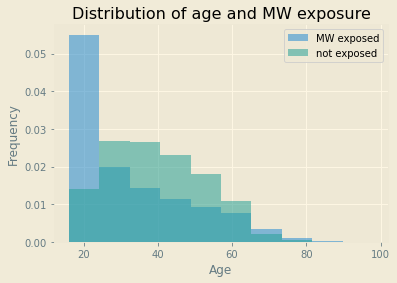

In [7]:

df[df.relMW_groups==1].age.plot(kind='hist',alpha=0.55, density=True)
df[df.relMW_groups==0].age.plot(kind='hist',alpha=0.55, density=True)
plt.legend()
plt.legend(labels=['MW exposed','not exposed'])
plt.xlabel('Age')
plt.title('Distribution of age and MW exposure')

#I putted in commas since is going to generate the chart below


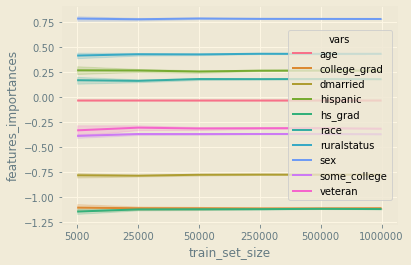

In [8]:
plot_features(df_logreg)

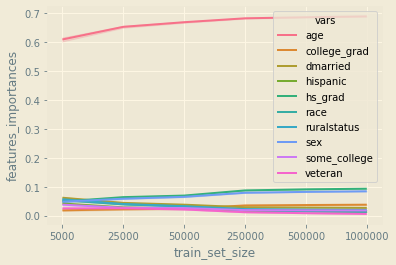

In [9]:
plot_features(df_tree)

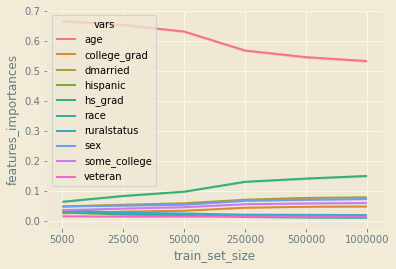

In [10]:
plot_features(df_forest)

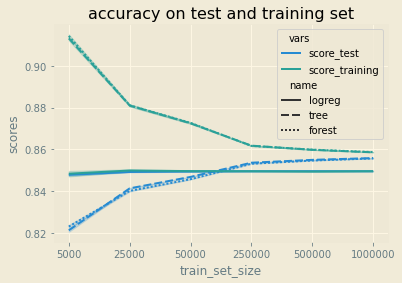

In [11]:
plot_scores()

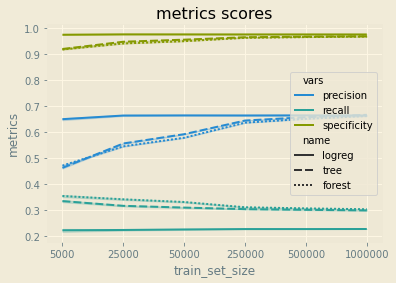

In [12]:
plot_metrics()